In [27]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

In [28]:
DIR = "/sf/alvra/data/p17569/res/scan_data/test_BS_013/"
#DIR = "/sf/alvra/data/p17589/raw/"

!ls -lah -t /sf/alvra/data/p17569/res/scan_data/test_BS_013/
#!ls -lah -t /sf/alvra/data/p17589/raw/

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 15M
drwxrwsr-x. 3 39147 p17569  32K Dec  5 18:20 ..
drwxr-sr-x. 2 root  p17569 4.0K Dec  5 18:19 .
-rw-r--r--. 1 root  p17569 2.4M Dec  5 18:19 test_BS_013_step0005.h5
-rw-r--r--. 1 root  p17569 2.4M Dec  5 18:19 test_BS_013_step0004.h5
-rw-r--r--. 1 root  p17569 2.4M Dec  5 18:19 test_BS_013_step0003.h5
-rw-r--r--. 1 root  p17569 2.4M Dec  5 18:19 test_BS_013_step0002.h5
-rw-r--r--. 1 root  p17569 2.4M Dec  5 18:19 test_BS_013_step0001.h5
-rw-r--r--. 1 root  p17569 2.4M Dec  5 18:19 test_BS_013_step0000.h5
ra-c-013.psi.ch
There are 6 files in the folder /sf/alvra/data/p17569/res/scan_data/test_BS_013/


In [37]:
fileName = "test_BS_013_step0000.h5"

BS_file = h5py.File(DIR + fileName)
#print(list(BS_file["data"].keys()))

PIPS_fluo = BS_file["SARES11-GES1:CH2_VAL_GET/data"]
Izero = BS_file["SARES11-LSCP10-FNS:CH1:VAL_GET/data"] 
LaserDiode = BS_file["SLAAR11-LSCP1-FNS:CH1:VAL_GET/data"] 
pulse_ids = BS_file["SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"]

<IPython.core.display.Javascript object>


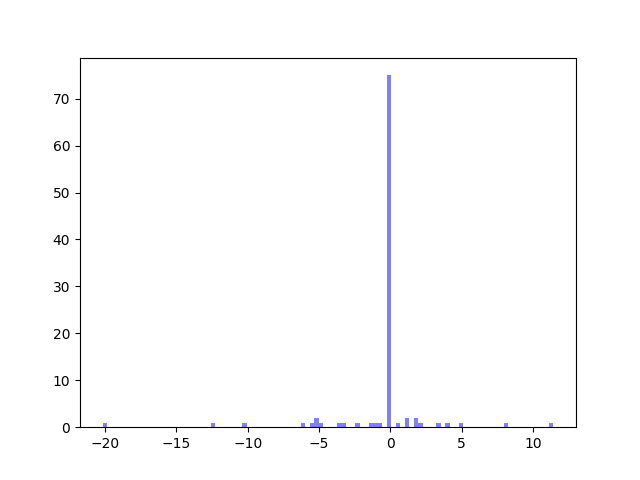

In [38]:
num_bins = 100
plt.figure()
plt.hist(Izero[:], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [6]:
#pulse_ids[0:40] % 20 == 0  # False = laser off -- this is for RepRate 5 (laser)
pulse_ids[0:40] % 4 == 0  # True = FEL shot (can be with or without laser) -- this is for RepRate 25 (FEL)
pulse_ids[0:40] % 2 == 0 # False = laser off -- this is for RepRate 50 (laser)

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False])

In [32]:
#FEL_on_off = pulse_ids[:] % 20 == 0 # True = FEL shot (can be with or without laser) -- this is for RepRate 5 (FEL)
FEL_on_off = pulse_ids[:] % 4 == 0 # True = FEL shot (can be with or without laser) -- this is for RepRate 25 (FEL)

#FEL_on_off_2 = pulse_ids[:] % 10 == 0 #-- this is for RepRate 10 (laser)
FEL_on_off_2 = pulse_ids[:] % 2 == 0 #-- this is for RepRate 50 (laser)

In [33]:
print(pulse_ids.size)

100


In [39]:
### this is now to loop over SEVERAL FILES

fileName_root = 'test_BS_013'
Int_threshold = 2

listfile = os.listdir(DIR)
number_files = int(len(listfile))

print ("Start processing",number_files,"files")


Delay_x = []
laser_pumped = []
err_laser_pumped = []
laser_unpumped = []
err_laser_unpumped = []
#FEL_on = []
#err_FEL_on = []
#FEL_off = []
#err_FEL_off = []
Izero_pumped = []
err_Izero_pumped = []
Izero_unpumped = []
err_Izero_unpumped = []

for j in range(number_files):

    n_ok = 0
    n_empty = 0
    n_pumped = 0
    n_unpumped = 0
    laser_pumped_loop = []
    laser_unpumped_loop = []
    FEL_on_loop = []
    FEL_off_loop = []
    Izero_pumped_loop =[]
    Izero_unpumped_loop =[]
    
    if j < 10:
        fileName_bs = fileName_root + "_step000" + str(j) + ".h5"
    else:
        fileName_bs = fileName_root + "_step00" + str(j) + ".h5"
    bs_file = h5py.File(DIR + fileName_bs, 'r')
    #PIPS_fluo = bs_file["data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"]
    pulse_ids = BS_file["SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"]
    Delay_loop = bs_file["SLAAR11-LMOT-M451:ENC_1_BS/data"]
    
    namefile = h5py.File(DIR + fileName, "r")
    jf_file = h5py.File(DIR + fileName, "r")
    print("step",j+1,"of",number_files,": Processing %s" % (fileName_bs))
    FEL_on_off = pulse_ids[:] % 4 == 0
    FEL_on_off_2 = pulse_ids[:] % 2 == 0 
    #nframes = 100
    nframes = pulse_ids.size
    
    for i in range(nframes):  
    
        data_fluo = bs_file["SARES11-GES1:CH2_VAL_GET/data"][i]
        data_Izero = bs_file["SARES11-LSCP10-FNS:CH1:VAL_GET/data"][i]
        data_Izero_2 = bs_file["SARES11-LSCP10-FNS:CH0:VAL_GET/data"][i]
        data_Laserdiode = bs_file["SLAAR11-LSCP1-FNS:CH1:VAL_GET/data"][i]
        
        if FEL_on_off_2[i] and (data_Izero > Int_threshold): # pass the filter to select 
            n_ok +=1
            if FEL_on_off[i]:          # This is the FEL pumped case (laser_on)
            
                laser_pumped_loop.append(data_Laserdiode)  
              #  FEL_on_loop.append(-data_fluo)
                Izero_pumped_loop.append(data_Izero) 
                n_pumped += 1

            else:                                             # This is the FEL un-pumped case (laser_off)
        
                laser_unpumped_loop.append(data_Laserdiode)
             #   FEL_off_loop.append(-data_fluo)
                Izero_unpumped_loop.append(data_Izero)
                n_unpumped += 1
                
        else:
            
            n_empty +=1
            
    print ('Total shots =',nframes,', Empty shots =',n_empty,', laser ON shots =',n_ok,', FEL pumped =',n_pumped,', FEL unpumped =',n_unpumped)
     
   # FEL_on_loop = np.array(FEL_on_loop)
   # FEL_off_loop = np.array(FEL_off_loop)
    laser_pumped_loop = np.array(laser_pumped_loop)
    laser_unpumped_loop = np.array(laser_unpumped_loop)
    Izero_pumped_loop = np.array(Izero_pumped_loop)
    Izero_unpumped_loop = np.array(Izero_unpumped_loop)
    
    
    Delay_x.append(Delay_loop[0])
    laser_pumped.append(laser_pumped_loop.mean())
    err_laser_pumped.append(laser_pumped_loop.std() / np.sqrt(n_pumped))
    laser_unpumped.append(laser_unpumped_loop.mean())
    err_laser_unpumped.append(laser_unpumped_loop.std() / np.sqrt(n_unpumped))
    #FEL_on.append(FEL_on_loop.mean())
    #err_FEL_on.append(FEL_on_loop.std() / np.sqrt(n_pumped))
    #FEL_off.append(FEL_off_loop.mean())
    #err_FEL_off.append(FEL_off_loop.std() / np.sqrt(n_unpumped))
    Izero_pumped.append(Izero_pumped_loop.mean())
    err_Izero_pumped.append(Izero_pumped_loop.std() / np.sqrt(n_pumped))
    Izero_unpumped.append(Izero_unpumped_loop.mean())
    err_Izero_unpumped.append(Izero_unpumped_loop.std() / np.sqrt(n_unpumped))


Delay_x = np.array(Delay_x)
laser_pumped = np.array(laser_pumped)
err_laser_pumped = np.array(err_laser_pumped)
laser_unpumped = np.array(laser_unpumped)
err_laser_unpumped = np.array(err_laser_unpumped)

#FEL_on = np.array(FEL_on)
#err_FEL_on = np.array(err_FEL_on)
#FEL_off = np.array(FEL_off)
#err_FEL_off = np.array(err_FEL_off)

Izero_pumped = np.array(Izero_pumped)
err_Izero_pumped = np.array(err_Izero_pumped)
Izero_unpumped = np.array(Izero_unpumped)
err_Izero_unpumped = np.array(err_Izero_unpumped)
    
print ("Job done!")

Start processing 6 files
step 1 of 6 : Processing test_BS_013_step0000.h5
Total shots = 100 , Empty shots = 94 , laser ON shots = 6 , FEL pumped = 6 , FEL unpumped = 0
step 2 of 6 : Processing test_BS_013_step0001.h5


/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/ipykernel/__main__.py:96: RuntimeWarning: Mean of empty slice.
/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/ipykernel/__main__.py:104: RuntimeWarning: Mean of empty slice.


Total shots = 100 , Empty shots = 91 , laser ON shots = 9 , FEL pumped = 9 , FEL unpumped = 0
step 3 of 6 : Processing test_BS_013_step0002.h5
Total shots = 100 , Empty shots = 93 , laser ON shots = 7 , FEL pumped = 7 , FEL unpumped = 0
step 4 of 6 : Processing test_BS_013_step0003.h5
Total shots = 100 , Empty shots = 90 , laser ON shots = 10 , FEL pumped = 10 , FEL unpumped = 0
step 5 of 6 : Processing test_BS_013_step0004.h5
Total shots = 100 , Empty shots = 91 , laser ON shots = 9 , FEL pumped = 9 , FEL unpumped = 0
step 6 of 6 : Processing test_BS_013_step0005.h5
Total shots = 100 , Empty shots = 93 , laser ON shots = 7 , FEL pumped = 7 , FEL unpumped = 0
Job done!


In [40]:
laser_pumped_norm = laser_pumped / Izero_pumped
err_laser_pumped_norm = err_laser_pumped / Izero_pumped
laser_unpumped_norm = laser_unpumped / Izero_unpumped
err_laser_unpumped_norm = err_laser_unpumped / Izero_unpumped

laser_diff = laser_pumped_norm - laser_unpumped_norm
Delay_ps = (Delay_x - 143)*3.333

### Run the following cell to plot pump-probe delay data

<IPython.core.display.Javascript object>


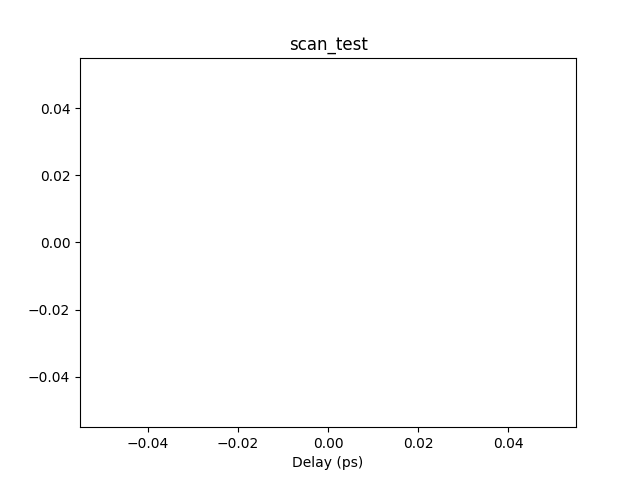

In [42]:
plt.figure()
plt.plot(Delay_ps, laser_diff, marker='.')

low_err= (laser_pumped_norm - laser_unpumped_norm) - np.sqrt(err_laser_pumped_norm**2+err_laser_unpumped_norm**2)
high_err= (laser_pumped_norm - laser_unpumped_norm) + np.sqrt(err_laser_pumped_norm**2+err_laser_unpumped_norm**2)

plt.fill_between(np.squeeze(Delay_ps), low_err, high_err, color='lightblue')
plt.title("scan_test")
plt.xlabel("Delay (ps)")
plt.show()
#plt.savefig('Timescan_7_diode')

In [26]:
savedir = "/das/work/p17/p17589/DataAnalysis/"
#savedir = "/das/work/p17/p17569/"

h5f = h5py.File(savedir + 'XAS_170_preEdge.h5','w')
#h5f = h5py.File(savedir + 'timeScan_3_BS.h5','w')

h5f.create_dataset('Delay_BS', data = Delay_x)
h5f.create_dataset('Energy_BS', data = Energy_x)
h5f.create_dataset('XAS_on', data = XAS_on)
h5f.create_dataset('err_XAS_on', data = err_XAS_on)
h5f.create_dataset('XAS_off', data = XAS_off)
h5f.create_dataset('err_XAS_off', data = err_XAS_off)
h5f.create_dataset('Izero_on', data = Izero_on)
h5f.create_dataset('err_Izero_on', data = err_Izero_on)
h5f.create_dataset('Izero_off', data = Izero_off)
h5f.create_dataset('err_Izero_off', data = err_Izero_off)

h5f.close()

In [115]:
Delay_ps_8 = Delay_ps.copy()
XAS_diff_8 = XAS_diff.copy()

<IPython.core.display.Javascript object>


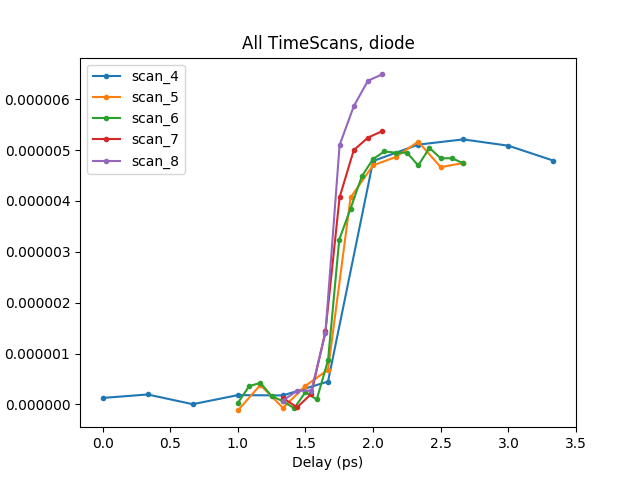

In [117]:
plt.figure()

plt.plot(Delay_ps_4, XAS_diff_4,label="scan_4", marker='.')
plt.plot(Delay_ps_5, XAS_diff_5,label="scan_5", marker='.')
plt.plot(Delay_ps_6, XAS_diff_6,label="scan_6", marker='.')
plt.plot(Delay_ps_7, XAS_diff_7,label="scan_7", marker='.')
plt.plot(Delay_ps_8, XAS_diff_8,label="scan_8", marker='.')

plt.title("All TimeScans, diode")
plt.xlabel("Delay (ps)")
plt.legend(loc="best")
plt.show()
plt.savefig('Timescans_all_diode')